In [5]:
!pip install yfinance

[                       0%                       ]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed

1 Failed download:
['MSFT']: OperationalError('database is locked')
C:\Users\village computer mpk\AppData\Local\Temp\ipykernel_14844\2301871003.py:16: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



        Annual Return  Volatility
Ticker                           
MSFT              NaN         NaN


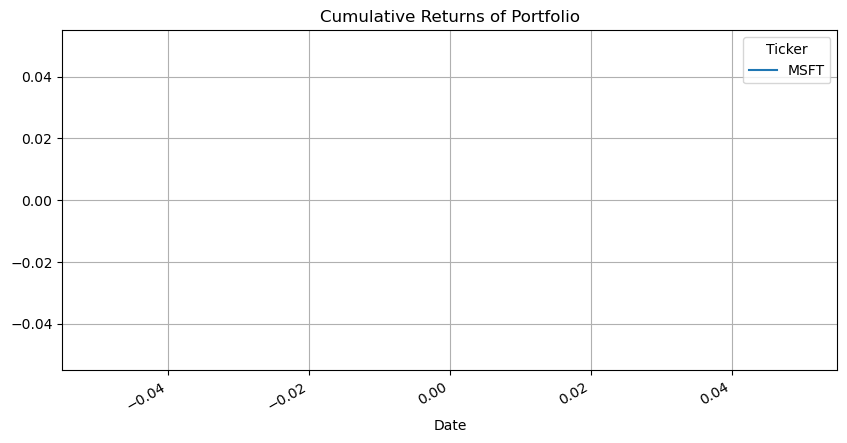

C:\Users\village computer mpk\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning:

All-NaN slice encountered

C:\Users\village computer mpk\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning:

All-NaN slice encountered



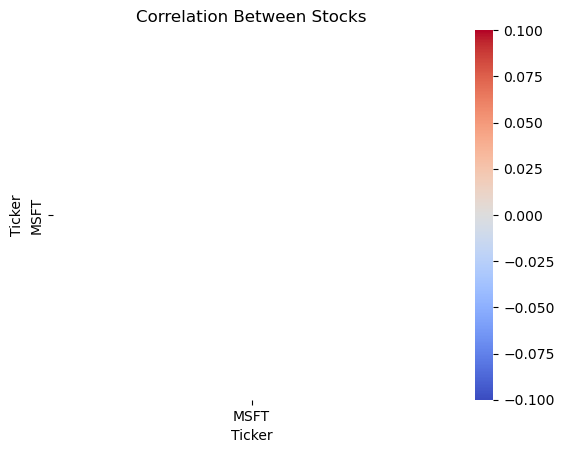

In [7]:
# Step 1: Import Libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Define the portfolio
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL']
start_date = '2022-01-01'
end_date = '2024-12-31'

# Step 3: Download price data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Step 4: Calculate daily returns
returns = data.pct_change().dropna()

# Step 5: Portfolio statistics
mean_returns = returns.mean() * 252  # Annualized returns
volatility = returns.std() * (252 ** 0.5)  # Annualized std dev

# Step 6: Summary table
summary = pd.DataFrame({
    'Annual Return': mean_returns,
    'Volatility': volatility
})
print(summary)

# Step 7: Plot cumulative returns
cumulative_returns = (1 + returns).cumprod()
cumulative_returns.plot(figsize=(10, 5), title='Cumulative Returns of Portfolio')
plt.grid(True)
plt.show()

# Step 8: Correlation heatmap
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Stocks')
plt.show()
